In [1]:
import pandas as pd
import json
import seaborn as sns

In [2]:
#Jupyter_Notebook/HACKATHON/Pet_Supplies_5.json.gz
input_file = 'Pet_Supplies_5.json'

In [3]:
with open(input_file) as f:
    lines = f.read().splitlines()

In [4]:
df_inter = pd.DataFrame(lines)
df_inter.columns = ['json_element']
df_inter.head()
#making a dataframe from a list

,json_element
0,"{""overall"": 3.0, ""vote"": ""2"", ""verified"": true..."
1,"{""overall"": 3.0, ""verified"": true, ""reviewTime..."
2,"{""overall"": 5.0, ""vote"": ""2"", ""verified"": true..."
3,"{""overall"": 3.0, ""verified"": true, ""reviewTime..."
4,"{""overall"": 2.0, ""verified"": true, ""reviewTime..."


In [5]:
df_inter['json_element'].apply(json.loads)

0          {'overall': 3.0, 'vote': '2', 'verified': True...
1          {'overall': 3.0, 'verified': True, 'reviewTime...
2          {'overall': 5.0, 'vote': '2', 'verified': True...
3          {'overall': 3.0, 'verified': True, 'reviewTime...
4          {'overall': 2.0, 'verified': True, 'reviewTime...
                                 ...                        
2098320    {'overall': 4.0, 'verified': True, 'reviewTime...
2098321    {'overall': 4.0, 'verified': True, 'reviewTime...
2098322    {'overall': 5.0, 'verified': True, 'reviewTime...
2098323    {'overall': 4.0, 'verified': True, 'reviewTime...
2098324    {'overall': 5.0, 'verified': True, 'reviewTime...
Name: json_element, Length: 2098325, dtype: object

In [6]:
df_final = pd.json_normalize(df_inter['json_element'].apply(json.loads))

In [7]:
df_final.head(1)

,overall,vote,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,...,style.Material:,style.Item Shape:,style.Scent Name:,style.Length:,style.Size Name:,style.Product Packaging:,style.Item Display Weight:,style.Number of Items:,style.Model Number:,style.Color Name:
0,3.0,2,True,"12 2, 2016",A2KN4FJVI2TZSF,0972585419,M.G.,I purchased this cd for my Pocket Parrot. It h...,It's okay,1480636800,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3.0,NaN,True,"10 17, 2016",A3RMA1DD66JDRV,0972585419,Susan P.,"Maybe it's just my Amazon parrot, but she's no...",It might work for a different bird,1476662400,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5.0,2,True,"09 9, 2016",AAANYRIEOIT3R,0972585419,Luggie Lugnut,I bought this to help me teach my blue quaker ...,I bought this to help me teach my blue quaker ...,1473379200,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.0,NaN,True,"08 31, 2016",A3W44VX0LXAOHU,0972585419,Melissa Partin,Bird showed no interest in it....,Three Stars,1472601600,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2.0,NaN,True,"08 18, 2016",A16ZDBZGKYDRSU,0972585419,Cheryle Bell,Didn't do a thing for my African Grey! He hate...,He hated it and it was very obnoxious,1471478400,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df_final.columns

Index(['overall', 'vote', 'verified', 'reviewTime', 'reviewerID', 'asin',
       'reviewerName', 'reviewText', 'summary', 'unixReviewTime',
       'style.Format:', 'style.Color:', 'image', 'style.Size:',
       'style.Pattern:', 'style.Design:', 'style.Package Type:',
       'style.Style:', 'style.Flavor Name:', 'style.Style Name:',
       'style.Wattage:', 'style.Flavor:', 'style.Package Quantity:',
       'style.Item Package Quantity:', 'style.Scent:', 'style.Material:',
       'style.Item Shape:', 'style.Scent Name:', 'style.Length:',
       'style.Size Name:', 'style.Product Packaging:',
       'style.Item Display Weight:', 'style.Number of Items:',
       'style.Model Number:', 'style.Color Name:'],
      dtype='object')

In [10]:
df_final.drop(['style.Item Shape:', 'style.Scent Name:', 'style.Length:',
       'style.Size Name:', 'style.Product Packaging:',
       'style.Item Display Weight:', 'style.Number of Items:',
       'style.Model Number:', 'style.Color Name:'], axis = 1, inplace=True)

In [12]:
df_final.columns

Index(['overall', 'vote', 'verified', 'reviewTime', 'reviewerID', 'asin',
       'reviewerName', 'reviewText', 'summary', 'unixReviewTime',
       'style.Format:', 'style.Color:', 'image', 'style.Size:',
       'style.Pattern:', 'style.Design:', 'style.Package Type:',
       'style.Style:', 'style.Flavor Name:', 'style.Style Name:',
       'style.Wattage:', 'style.Flavor:', 'style.Package Quantity:',
       'style.Item Package Quantity:', 'style.Scent:', 'style.Material:'],
      dtype='object')

In [13]:
df_final['verified'].value_counts().sort_values(ascending=True)

False     169283
True     1929042
Name: verified, dtype: int64

In [64]:
# genre_rating = df.groupby('Category')
# genre_rating = genre_rating.get_group('GAME')
# genre_rating = genre_rating.groupby('Genres').mean()
# genre_rating['Rating'].sort_values(ascending=False)

verify_rating = df_final.groupby('verified')['overall'].value_counts()
verify_rating.sort_index()

verified  overall
False     1.0          18072
          2.0           9889
          3.0          14859
          4.0          27328
          5.0          99135
True      1.0         118514
          2.0          97852
          3.0         164671
          4.0         266869
          5.0        1281136
Name: overall, dtype: int64

In [15]:
df_final.columns

Index(['overall', 'vote', 'verified', 'reviewTime', 'reviewerID', 'asin',
       'reviewerName', 'reviewText', 'summary', 'unixReviewTime',
       'style.Format:', 'style.Color:', 'image', 'style.Size:',
       'style.Pattern:', 'style.Design:', 'style.Package Type:',
       'style.Style:', 'style.Flavor Name:', 'style.Style Name:',
       'style.Wattage:', 'style.Flavor:', 'style.Package Quantity:',
       'style.Item Package Quantity:', 'style.Scent:', 'style.Material:'],
      dtype='object')

In [16]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import matplotlib
from matplotlib import pyplot as plt
# import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [17]:
def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    # replacing the punctuations with no space, 
    # which in effect deletes the punctuation marks 
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)

In [18]:
df_final['reviewText']= df_final['reviewText'].astype(str)

In [94]:
df_final['reviewText'] = df_final['reviewText'].apply(remove_punctuation)
df_final.head(1)

,overall,verified,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,month,day,year,polarity
0,3.0,True,A2KN4FJVI2TZSF,0972585419,M.G.,purchased cd pocket parrot woman man speaking ...,It's okay,1480636800,12,2,2016,-0.014286
1,3.0,True,A3RMA1DD66JDRV,0972585419,Susan P.,maybe amazon parrot shes picking quickly well,It might work for a different bird,1476662400,10,17,2016,0.333333
2,5.0,True,AAANYRIEOIT3R,0972585419,Luggie Lugnut,bought help teach blue quaker named booger tal...,I bought this to help me teach my blue quaker ...,1473379200,09,9,2016,0.333333
3,3.0,True,A3W44VX0LXAOHU,0972585419,Melissa Partin,bird showed interest,Three Stars,1472601600,08,31,2016,0.000000
4,2.0,True,A16ZDBZGKYDRSU,0972585419,Cheryle Bell,didnt thing african grey hated obnoxious,He hated it and it was very obnoxious,1471478400,08,18,2016,-0.316667
5,4.0,True,A20M3TKXKB1M1T,0972585419,ocean girl,like cockatiel sure listens far speak,I like it - but the Cockatiel I am not so ...,1468713600,07,17,2016,0.300000
6,3.0,True,A2C26KQVC1SMHZ,0972585419,Amazon Customer,cd read better expecting dvd,"I should have read better, I was expecting a DVD",1449187200,12,4,2015,0.500000
7,5.0,True,A1SR90QMEF7G5D,0972585419,Christina Lyn DeSantis,parot loves cd started repeating phrases week ...,Five Stars,1427414400,03,27,2015,0.000000
8,5.0,True,A39RBE0IAAUCYN,0972585419,D,good,Five Stars,1425427200,03,4,2015,0.700000
9,1.0,True,ALF0MRD3LRTPN,0972585419,Helen Sick,relly disappointed cd lot sayings really stupi...,I was reLly disappointed the cd has a lot of s...,1421107200,01,13,2015,-0.650000


In [20]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ronamasab/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [21]:
# extracting the stopwords from nltk library
sw = stopwords.words('english')
# displaying the stopwords
np.array(sw)

array(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
       'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
       'by', 'for', 'with', 'about', 'against', 'between', 'into',
       'through', 'during', 'before', 'after', 'above', 'below', 'to',
       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
       'again', 'further', 'then', 'once', 'here', 'there', 'when',
       'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

In [22]:
print("Number of stopwords: ", len(sw))

Number of stopwords:  179


In [23]:
def stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    # joining the list of words with space separator
    return " ".join(text)

In [24]:
df_final['reviewText'] = df_final['reviewText'].apply(stopwords)
df_final.head(1)

,overall,vote,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,...,style.Package Type:,style.Style:,style.Flavor Name:,style.Style Name:,style.Wattage:,style.Flavor:,style.Package Quantity:,style.Item Package Quantity:,style.Scent:,style.Material:
0,3.0,2,True,"12 2, 2016",A2KN4FJVI2TZSF,0972585419,M.G.,purchased cd pocket parrot woman man speaking ...,It's okay,1480636800,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3.0,NaN,True,"10 17, 2016",A3RMA1DD66JDRV,0972585419,Susan P.,maybe amazon parrot shes picking quickly well,It might work for a different bird,1476662400,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5.0,2,True,"09 9, 2016",AAANYRIEOIT3R,0972585419,Luggie Lugnut,bought help teach blue quaker named booger tal...,I bought this to help me teach my blue quaker ...,1473379200,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.0,NaN,True,"08 31, 2016",A3W44VX0LXAOHU,0972585419,Melissa Partin,bird showed interest,Three Stars,1472601600,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2.0,NaN,True,"08 18, 2016",A16ZDBZGKYDRSU,0972585419,Cheryle Bell,didnt thing african grey hated obnoxious,He hated it and it was very obnoxious,1471478400,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,NaN,True,"07 17, 2016",A20M3TKXKB1M1T,0972585419,ocean girl,like cockatiel sure listens far speak,I like it - but the Cockatiel I am not so ...,1468713600,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,3.0,NaN,True,"12 4, 2015",A2C26KQVC1SMHZ,0972585419,Amazon Customer,cd read better expecting dvd,"I should have read better, I was expecting a DVD",1449187200,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,5.0,NaN,True,"03 27, 2015",A1SR90QMEF7G5D,0972585419,Christina Lyn DeSantis,parot loves cd started repeating phrases week ...,Five Stars,1427414400,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,5.0,NaN,True,"03 4, 2015",A39RBE0IAAUCYN,0972585419,D,good,Five Stars,1425427200,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1.0,NaN,True,"01 13, 2015",ALF0MRD3LRTPN,0972585419,Helen Sick,relly disappointed cd lot sayings really stupi...,I was reLly disappointed the cd has a lot of s...,1421107200,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [26]:
# ! pip install wordcloud

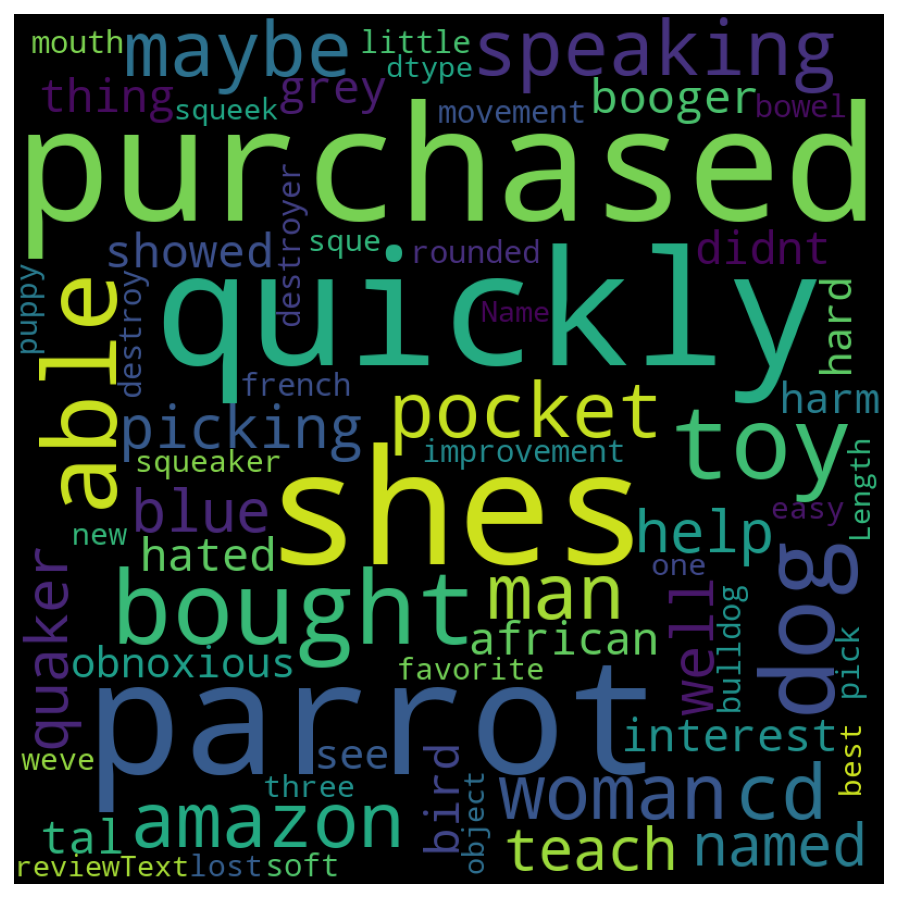

In [27]:
wordcloud = WordCloud(width = 800, height = 800, background_color = 'black', stopwords = sw, max_words = 1000
                      , min_font_size = 20).generate(str(df_final['reviewText']))
#plot the word cloud
fig = plt.figure(figsize = (8,8), facecolor = None)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [28]:
verify = df_final[(df_final['verified']== True)]
verify

,overall,vote,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,...,style.Package Type:,style.Style:,style.Flavor Name:,style.Style Name:,style.Wattage:,style.Flavor:,style.Package Quantity:,style.Item Package Quantity:,style.Scent:,style.Material:
0,3.0,2,True,"12 2, 2016",A2KN4FJVI2TZSF,0972585419,M.G.,purchased cd pocket parrot woman man speaking ...,It's okay,1480636800,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3.0,NaN,True,"10 17, 2016",A3RMA1DD66JDRV,0972585419,Susan P.,maybe amazon parrot shes picking quickly well,It might work for a different bird,1476662400,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5.0,2,True,"09 9, 2016",AAANYRIEOIT3R,0972585419,Luggie Lugnut,bought help teach blue quaker named booger tal...,I bought this to help me teach my blue quaker ...,1473379200,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.0,NaN,True,"08 31, 2016",A3W44VX0LXAOHU,0972585419,Melissa Partin,bird showed interest,Three Stars,1472601600,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2.0,NaN,True,"08 18, 2016",A16ZDBZGKYDRSU,0972585419,Cheryle Bell,didnt thing african grey hated obnoxious,He hated it and it was very obnoxious,1471478400,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2098320,4.0,NaN,True,"06 1, 2018",A2BWOAJ5KSAL4C,B01HIQ9NGU,TexasHonda,harm hard see improvement soft bowel movement ...,Four Stars,1527811200,...,NaN,"1 Box, 30 Packets",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2098321,4.0,NaN,True,"11 26, 2017",A1X0IOOF3J0OXB,B01HIV7FC4,Pamela Mathers,rounded bought little dog shes able pick mouth...,Read description carefully.,1511654400,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2098322,5.0,NaN,True,"09 21, 2017",A3UCIDW3BYEGB1,B01HIV7FC4,pterri,destroyer french bulldog able destroy squeaker...,Sturdy Squeaker,1505952000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2098323,4.0,NaN,True,"06 16, 2017",A2JO0GAAKLQ0SH,B01HIV7FC4,Erik,one dogs favorite toys three quickly lost sque...,"Dog loves it, but the squeakers don't last",1497571200,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
not_verify = df_final[(df_final['verified']== False)]
not_verify

,overall,vote,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,...,style.Package Type:,style.Style:,style.Flavor Name:,style.Style Name:,style.Wattage:,style.Flavor:,style.Package Quantity:,style.Item Package Quantity:,style.Scent:,style.Material:
12,1.0,6,False,"03 23, 2013",A29BY9ABO4FDEZ,0972585419,Canaan dog mom,want bird interact interact bird parrots menta...,Waste of $,1363996800,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,1.0,20,False,"10 24, 2008",A112XLN4J4TYLR,0972585419,Mor and Tookie,biggest waste money buy work people saying cer...,Waste of Money,1224806400,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,5.0,NaN,False,"04 16, 2014",AF3EVH5OFWIQN,1300450991,Leon,puppy booster herbal supplement dogs puppy bes...,Puppy Booster Herbal Supplement for Dogs,1397606400,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27,5.0,NaN,False,"04 16, 2014",AQUHJVX6O882V,1300450991,Fortuna Visual Group,good puppies problems keep problems easy give ...,good for puppies who not have problems to keep...,1397606400,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28,5.0,NaN,False,"03 18, 2013",A2YPQ9TO5HXMLR,1300450991,Igor Shtindler,puppy booster perfect puppy love works almost ...,"puppy booster is perfect for my puppy, I love ...",1363564800,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2098257,5.0,NaN,False,"05 7, 2016",A1X17VE8K6E1U4,B01HHUA7FS,AZRN,received pet cuisine dog treats time well pack...,I love that this is made with 100 percent natu...,1462579200,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2098266,5.0,NaN,False,"02 8, 2018",A1DZUKOCS0GLZE,B01HHUAT92,Kathy,datahookproductlinklinked classalinknormal hre...,My Dog Loves Them,1518048000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2098291,5.0,NaN,False,"08 14, 2017",A93IJ1NISIJZN,B01HI7U1YW,L Long,fav cats go nuts youngest likes take wand daug...,"This is a fav for my cats, they all ...",1502668800,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2098307,1.0,NaN,False,"12 11, 2017",A8CO0IDUUKV7J,B01HIJGHOS,ShrinkingSmith82,got new puppy ranch raised aka fleas cause rai...,IT STINKS.,1512950400,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


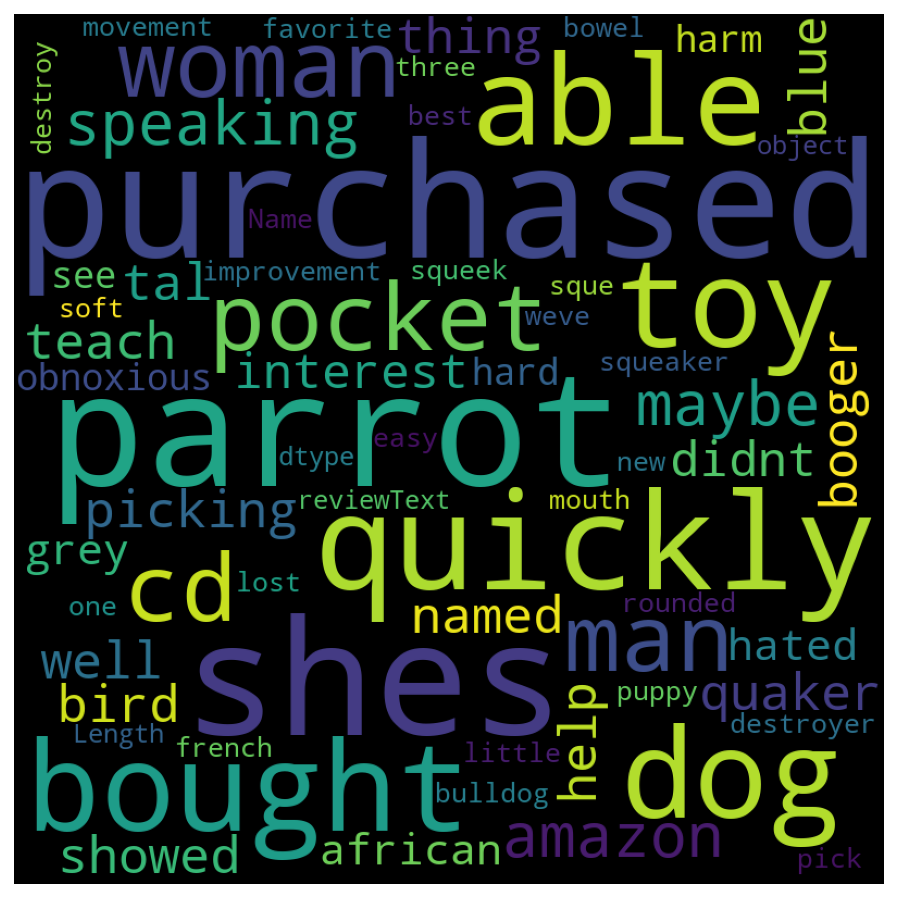

In [30]:
#### now i wil run a word cloud on verified
wordcloud = WordCloud(width = 800, height = 800, background_color = 'black', stopwords = sw, max_words = 1000
                      , min_font_size = 20).generate(str(verify['reviewText']))
#plot the word cloud
fig = plt.figure(figsize = (8,8), facecolor = None)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

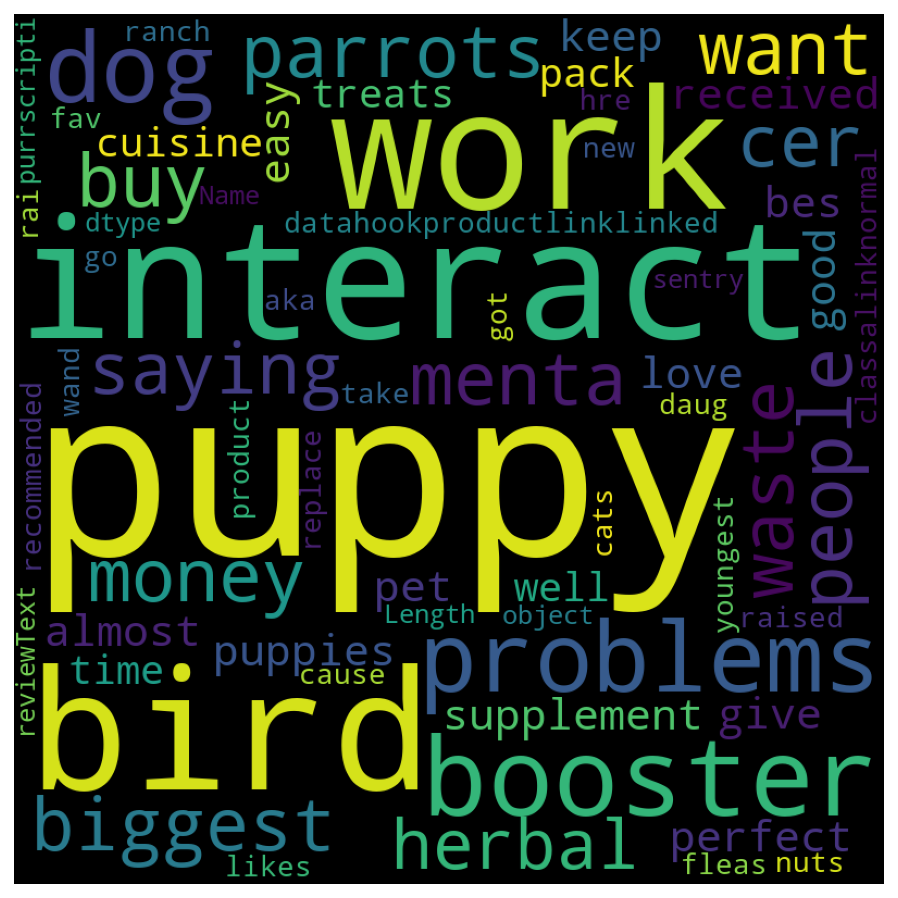

In [31]:
#### now i wil run a word cloud on unverified
wordcloud = WordCloud(width = 800, height = 800, background_color = 'black', stopwords = sw, max_words = 1000
                      , min_font_size = 20).generate(str(not_verify['reviewText']))
#plot the word cloud
fig = plt.figure(figsize = (8,8), facecolor = None)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [38]:
df_final[['month', 'day', 'year']] = df_final.reviewTime.str.split(' ', expand = True)

In [39]:
df_final.head(1)

,overall,vote,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,...,style.Style Name:,style.Wattage:,style.Flavor:,style.Package Quantity:,style.Item Package Quantity:,style.Scent:,style.Material:,month,day,year
0,3.0,2,True,"12 2, 2016",A2KN4FJVI2TZSF,0972585419,M.G.,purchased cd pocket parrot woman man speaking ...,It's okay,1480636800,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12,"2,",2016


In [40]:
df_final.columns

Index(['overall', 'vote', 'verified', 'reviewTime', 'reviewerID', 'asin',
       'reviewerName', 'reviewText', 'summary', 'unixReviewTime',
       'style.Format:', 'style.Color:', 'image', 'style.Size:',
       'style.Pattern:', 'style.Design:', 'style.Package Type:',
       'style.Style:', 'style.Flavor Name:', 'style.Style Name:',
       'style.Wattage:', 'style.Flavor:', 'style.Package Quantity:',
       'style.Item Package Quantity:', 'style.Scent:', 'style.Material:',
       'month', 'day', 'year'],
      dtype='object')

In [41]:
df_final.drop(['style.Format:', 'style.Color:', 'image', 'style.Size:',
       'style.Pattern:', 'style.Design:', 'style.Package Type:',
       'style.Style:', 'style.Flavor Name:', 'style.Style Name:',
       'style.Wattage:', 'style.Flavor:', 'style.Package Quantity:',
       'style.Item Package Quantity:', 'style.Scent:', 'style.Material:'], axis = 1, inplace=True)

In [42]:
df_final.head(1)

,overall,vote,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,month,day,year
0,3.0,2,True,"12 2, 2016",A2KN4FJVI2TZSF,0972585419,M.G.,purchased cd pocket parrot woman man speaking ...,It's okay,1480636800,12,"2,",2016


In [43]:
df_final['day'] = df_final['day'].map(lambda x: x.rstrip(','))

In [44]:
df_final.head(1)

,overall,vote,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,month,day,year
0,3.0,2,True,"12 2, 2016",A2KN4FJVI2TZSF,0972585419,M.G.,purchased cd pocket parrot woman man speaking ...,It's okay,1480636800,12,2,2016


In [45]:
df_final.drop(['reviewTime'], axis = 1, inplace=True)

In [46]:
df_final.drop(['vote'], axis = 1, inplace = True)

In [47]:
df_final.head(1)

,overall,verified,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,month,day,year
0,3.0,True,A2KN4FJVI2TZSF,0972585419,M.G.,purchased cd pocket parrot woman man speaking ...,It's okay,1480636800,12,2,2016


In [48]:
df_final['year'].value_counts().sort_index()

2001         1
2002         7
2003         8
2004        47
2005       177
2006       595
2007      2022
2008      4083
2009      7179
2010     12562
2011     27118
2012     53430
2013    155975
2014    277980
2015    437583
2016    527996
2017    415581
2018    175981
Name: year, dtype: int64

In [49]:
df_final['month'].value_counts().sort_index()

01    205775
02    178118
03    194216
04    175443
05    168394
06    159444
07    174858
08    173092
09    158229
10    159763
11    160222
12    190771
Name: month, dtype: int64

In [50]:
df_final['verified'].value_counts().sort_index()

False     169283
True     1929042
Name: verified, dtype: int64

In [51]:
df_final['asin'].value_counts()

B000W5QSYA    13724
B0013MVJPY    11822
B0012NV9NQ    11820
B0009YD8OC     6547
B001A5IXRG     5913
              ...  
B000ZH6SHC        1
B0011UDMGM        1
B001211MUS        1
B000WEA2X4        1
B000YIYNZ6        1
Name: asin, Length: 42531, dtype: int64

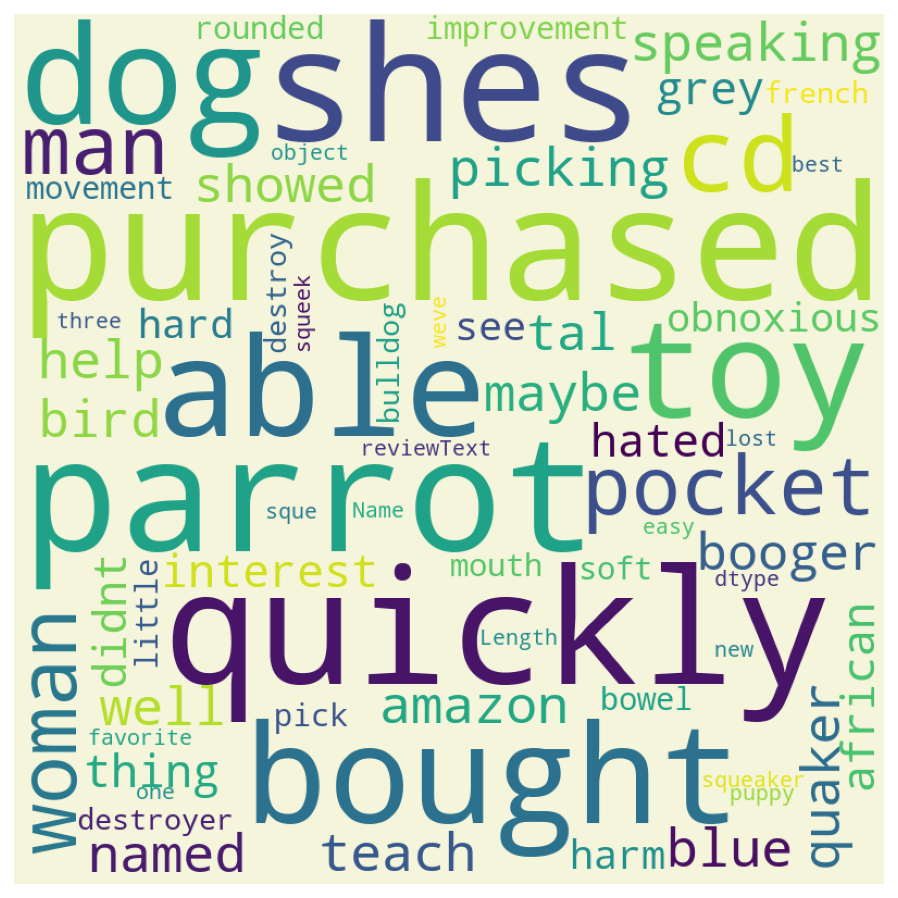

In [78]:
wordcloud = WordCloud(width = 800, height = 800, background_color = 'beige', stopwords = sw, max_words = 1000
                      , min_font_size = 20).generate(str(df_final['reviewText']))
#plot the word cloud
fig = plt.figure(figsize = (8,8), facecolor = None)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [53]:
df_final.to_csv('pets_new.csv')

In [54]:
df_final.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2098325 entries, 0 to 2098324
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   overall         2098325 non-null  float64
 1   verified        2098325 non-null  bool   
 2   reviewerID      2098325 non-null  object 
 3   asin            2098325 non-null  object 
 4   reviewerName    2098240 non-null  object 
 5   reviewText      2098325 non-null  object 
 6   summary         2097909 non-null  object 
 7   unixReviewTime  2098325 non-null  int64  
 8   month           2098325 non-null  object 
 9   day             2098325 non-null  object 
 10  year            2098325 non-null  object 
dtypes: bool(1), float64(1), int64(1), object(8)
memory usage: 162.1+ MB


In [56]:
import textblob
from textblob import TextBlob

In [57]:
# Create quick lambda functions to find the polarity of each review
# Terminal / Anaconda Navigator: conda install -c conda-forge textblobfrom textblob import TextBlob
df_final['reviewText']= df_final['reviewText'].astype(str) #Make sure about the correct data type
pol = lambda x: TextBlob(x).sentiment.polarity
df_final['polarity'] = df_final['reviewText'].apply(pol) # depending on the size of your data, this step may take some time.

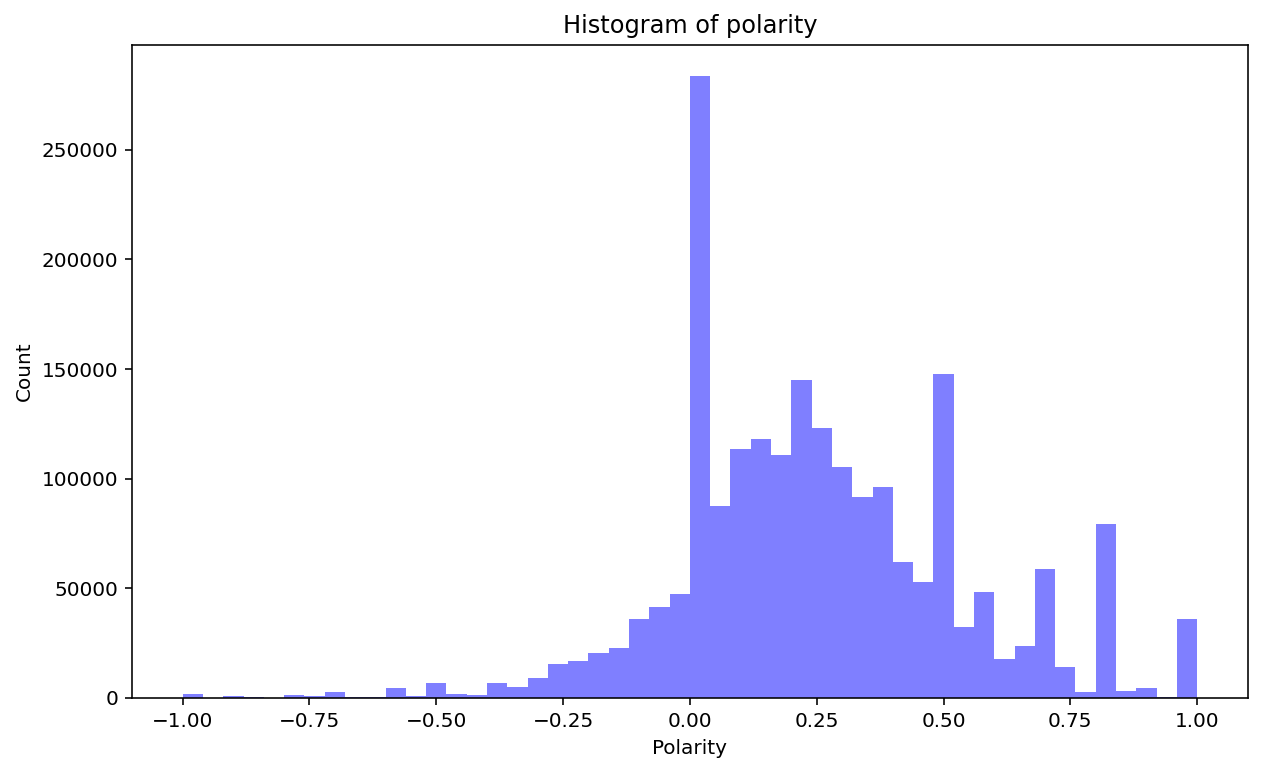

In [81]:
num_bins = 50
plt.figure(figsize=(10,6))
n, bins, patches = plt.hist(df_final.polarity, num_bins, facecolor='blue', alpha=0.5)
plt.xlabel('Polarity')
plt.ylabel('Count')
plt.title('Histogram of polarity')
plt.show();

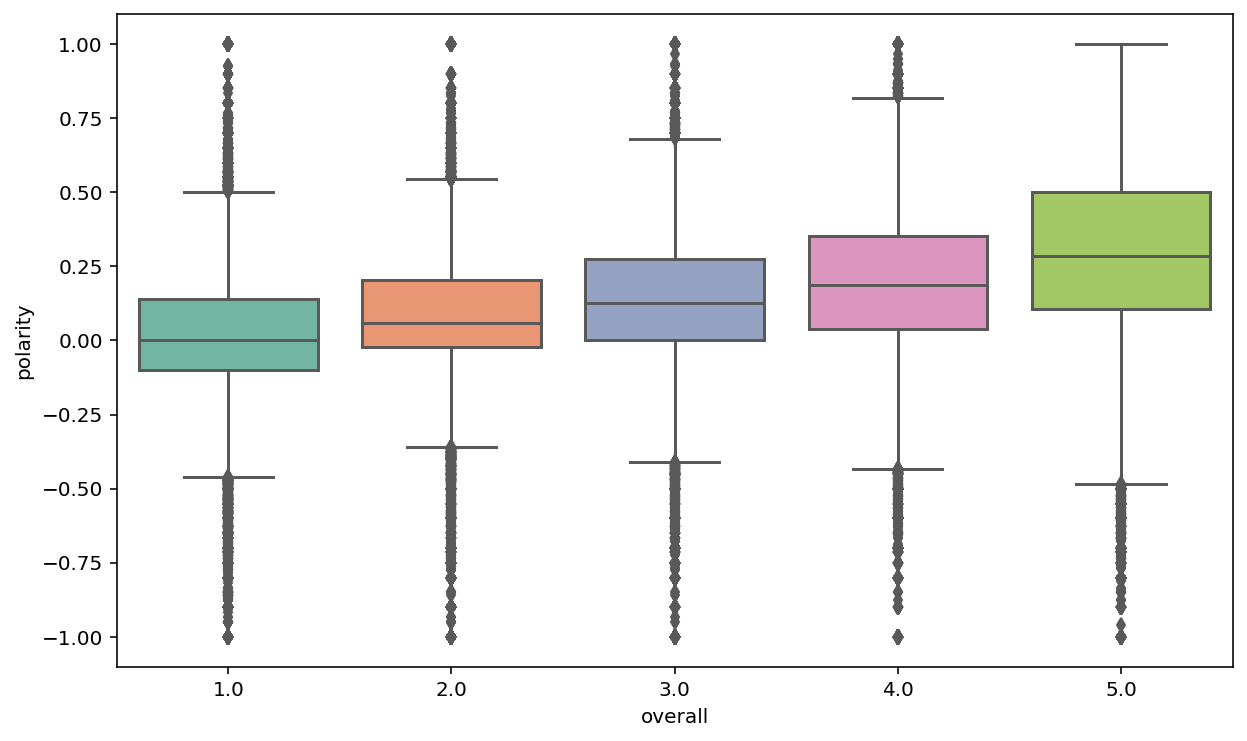

In [88]:
plt.figure(figsize=(10,6))
sns.boxplot(x='overall', y='polarity', data=df_final, palette = "Set2")

plt.show();

In [71]:
# not_verify = df_final[(df_final['verified']== False)]
# not_verify
pos_pol = df_final[(df_final['polarity']>0)]

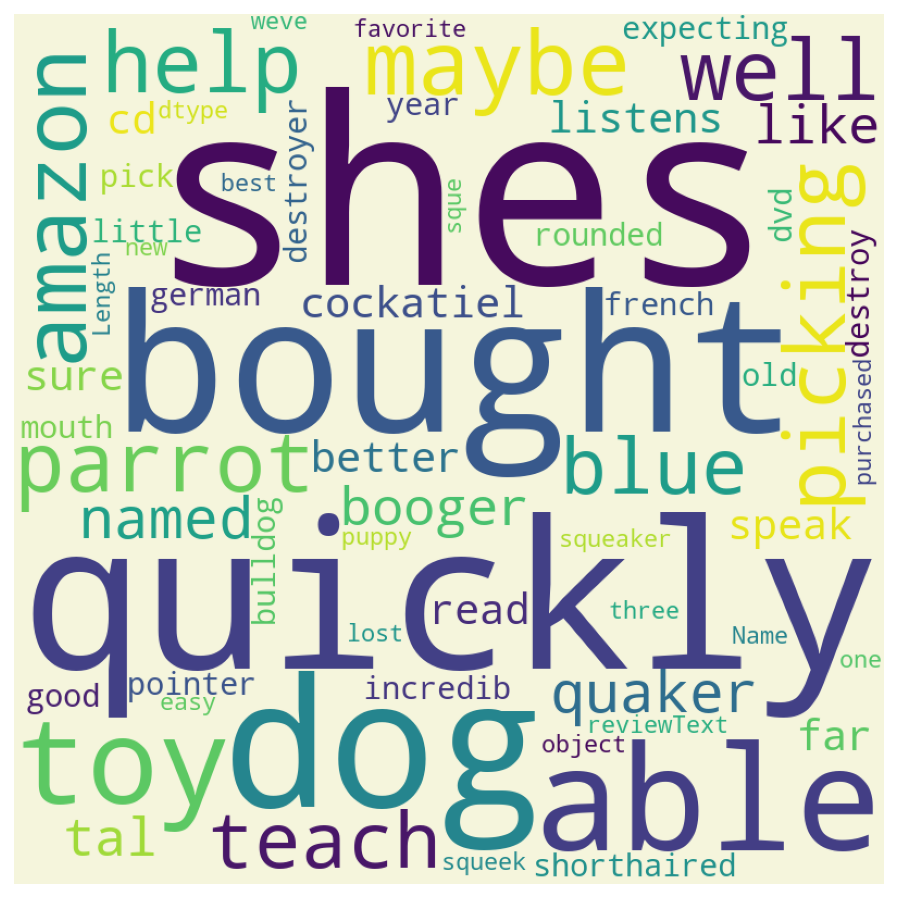

In [89]:
#### now i wil run a word cloud on verified
wordcloud = WordCloud(width = 800, height = 800, background_color = 'beige', stopwords = sw, max_words = 1000
                      , min_font_size = 20).generate(str(pos_pol['reviewText']))
#plot the word cloud
fig = plt.figure(figsize = (8,8), facecolor = None)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [73]:
neg_pol = df_final[(df_final['polarity']<0)]

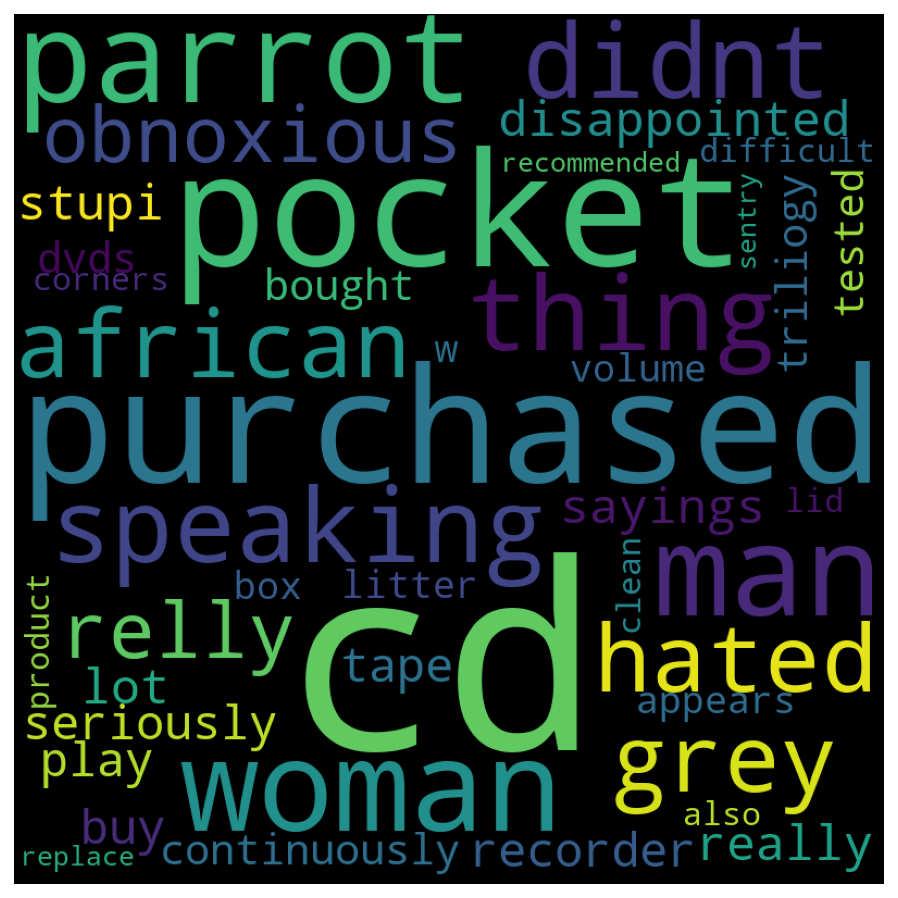

In [93]:
#### now i wil run a word cloud on verified
wordcloud = WordCloud(width = 800, height = 800, background_color = 'black', stopwords = sw, max_words = 1000
                      , min_font_size = 20).generate(str(neg_pol['reviewText']))
#plot the word cloud
fig = plt.figure(figsize = (8,8), facecolor = None)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()